<a href="https://colab.research.google.com/github/CHIRANJEET12/Machine-Learning/blob/main/gradientdecent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Create simple dataset  or use dataset

In [2]:
x = np.array([1,2,3,4,5])
y = np.array([6,7,8,9,10])  # True equation: y = 2 + 3x

Add a bias term (intercept column)====We need to add a column of 1s to account for 0.

In [3]:
m = len(x)
x_b = np.c_[np.ones(m),x]

initialize parameters

In [4]:
# Start with theta0=0, theta1=0
theta = np.zeros(2)

Set learning rate and iterations

In [9]:
alpha = 0.01    # Learning rate (small step size)
iterations  = 1000   # How many steps to run


Gradient descent loop

In [30]:
for i in range(iterations ):
    predictions = x_b.dot(theta)             # Compute h(x) for all inputs
    errors = predictions - y                 # Difference from actual y
    gradients = (1/m) * x_b.T.dot(errors)    # Partial derivatives
    theta = theta - alpha * gradients        # Update parameters  repeat convergence theorum


In [31]:
print(f"Learned parameters: theta0 = {theta[0]:.2f}, theta1 = {theta[1]:.2f}")

Learned parameters: theta0 = 5.00, theta1 = 1.00


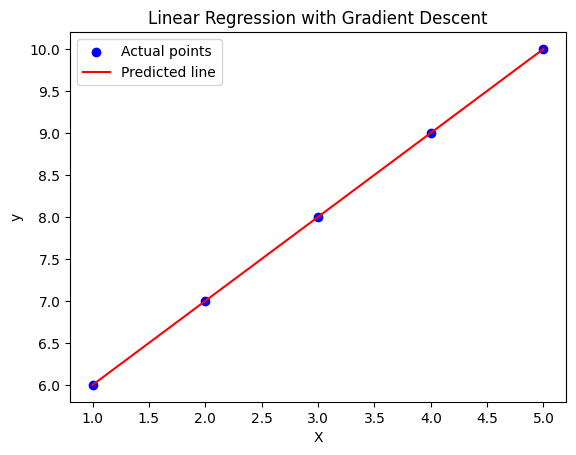

In [32]:
plt.scatter(x, y, color='blue', label='Actual points')
plt.plot(x, x_b.dot(theta), color='red', label='Predicted line')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Gradient Descent')
plt.show()


In [22]:
from sklearn.metrics import r2_score

In [33]:
score = r2_score(y,predictions)
print(score)

0.9999995714454222
